In [1]:
import os
from os.path import join
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray, memmap, dtype
from typing import Any
from scipy.fft import fft, fftshift

In [16]:
def load_wav_file(wav_fname: str) -> tuple[ndarray[Any, dtype[Any]] | memmap[Any, dtype[Any]], int]:
    data_dir = join(os.getcwd(), 'data')
    wav_fname = join(data_dir, wav_fname)
    print(f"getting wav from {wav_fname}")

    sample_rate, data = wavfile.read(wav_fname)
    print(f"sample rate = {sample_rate}")
    if len(data.shape) > 1:
        print(f"number of channels = {data.shape[1]}")
        # only first channel (both channels should be roughly the same)
        data = data[:, 0]
    else:
        print(f"single channel file")
    length = data.shape[0] / sample_rate
    print(f"length = {length}s")

    return data, sample_rate

In [17]:
def print_arr(arr):
    print("start")
    for i in range(0, 20):
        print(arr[i])
    print("middle")
    for i in range(len(arr)//2-10, len(arr)//2+10):
        print(arr[i])
    print("end")
    for i in range(len(arr)-20, len(arr)-1):
        print(arr[i])

In [24]:
def plot_wave(data: ndarray[Any, dtype[Any]] | memmap[Any, dtype[Any]], sample_rate: int):
    length = data.shape[0] / sample_rate
    time = np.linspace(0., length, data.shape[0])
    plt.plot(time, data, label="single channel")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

    N = len(data)
    frequencies = np.fft.fftfreq(N, 1/sample_rate) # the frequencies of the FFT that will be calculated
    # [0, 1, 2, ..., N/2-1, -N/2, -N/2+1, ..., -1] / (N * dt)

    fft_data = fft(data)

    # plot the magnitude of the FFT with low frequencies in the center
    frequencies_shifted = fftshift(frequencies)
    # [-N/2, -N/2+1, ..., -1, 0, 1, 2, ..., N/2-1] / (N * dt)
    fft_data_shifted = fftshift(fft_data) # shift the low frequencies to the center

    plt.subplot(2, 1, 2)
    plt.plot(frequencies_shifted, np.abs(fft_data_shifted))
    plt.title('Frequency Domain Representation (Low Frequency at Center)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim(-sample_rate / 2, sample_rate / 2)  # freq range from -Fs/2 to Fs/2

    plt.tight_layout()
    plt.show()

    magnitude_spectrum = np.abs(fft_data) # remove the imaginary part by (a**2 + b**2)**0.5
    magnitude_spectrum_real = np.array([x for x in magnitude_spectrum])
    for i in range(0, len(magnitude_spectrum_real)):
        assert magnitude_spectrum_real[i] == magnitude_spectrum[i]

    pos_freq_indices = np.where(frequencies > 0) # also exclude freq=0 (dc component)
    pos_freqs = frequencies[pos_freq_indices] # only take the positive frequencies
    pos_magnitudes = magnitude_spectrum_real[pos_freq_indices]

    top_indices = np.argsort(pos_magnitudes)[-3:][::-1]
    top_frequencies = pos_freqs[top_indices]
    top_magnitudes = pos_magnitudes[top_indices]

    for i, (freq, mag) in enumerate(zip(top_frequencies, top_magnitudes)):
        print(f"Top {i+1} dominant frequency: {freq:.2f} Hz with magnitude {mag:.2f}")

getting wav from /Users/idhibhatpankam/Code/courses/CEM LAB/data/file1.wav
sample rate = 44100
number of channels = 2
length = 1.0439909297052155s


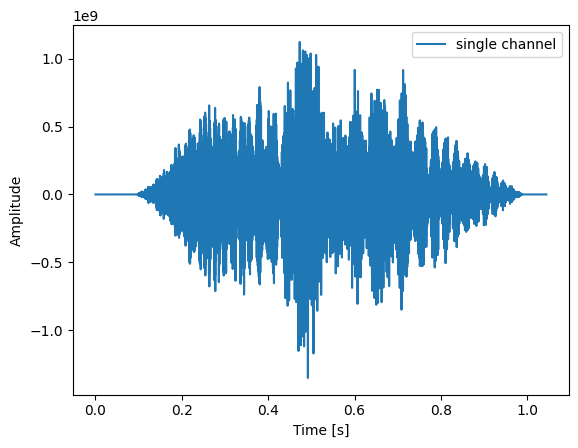

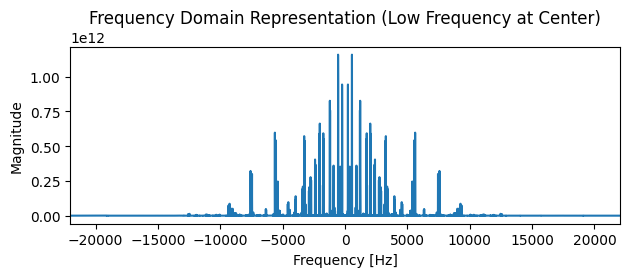

Top 1 dominant frequency: 556.52 Hz with magnitude 1158205165264.65
Top 2 dominant frequency: 557.48 Hz with magnitude 1157527790108.07
Top 3 dominant frequency: 547.90 Hz with magnitude 1068673045690.18


In [25]:
wav1, sample_rate1 = load_wav_file('file1.wav')
plot_wave(wav1, sample_rate1)

getting wav from /Users/idhibhatpankam/Code/courses/CEM LAB/data/file2.wav
sample rate = 44100
number of channels = 2
length = 1.2503401360544217s


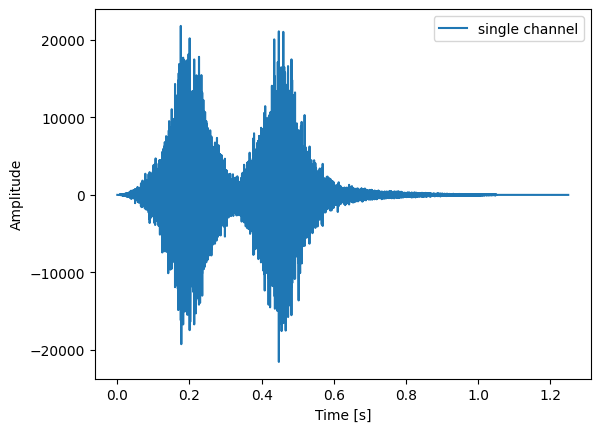

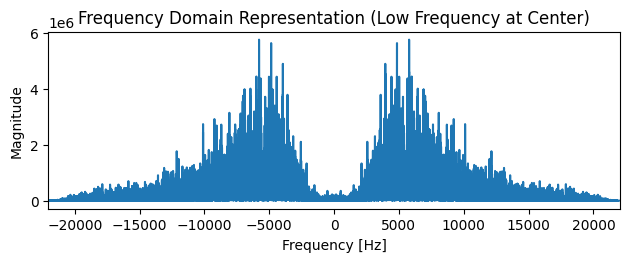

Top 1 dominant frequency: 5786.43 Hz with magnitude 5749714.34
Top 2 dominant frequency: 4852.28 Hz with magnitude 5626401.38
Top 3 dominant frequency: 3948.53 Hz with magnitude 4886932.60


In [26]:
wav2, sample_rate2 = load_wav_file('file2.wav')
plot_wave(wav2, sample_rate2)

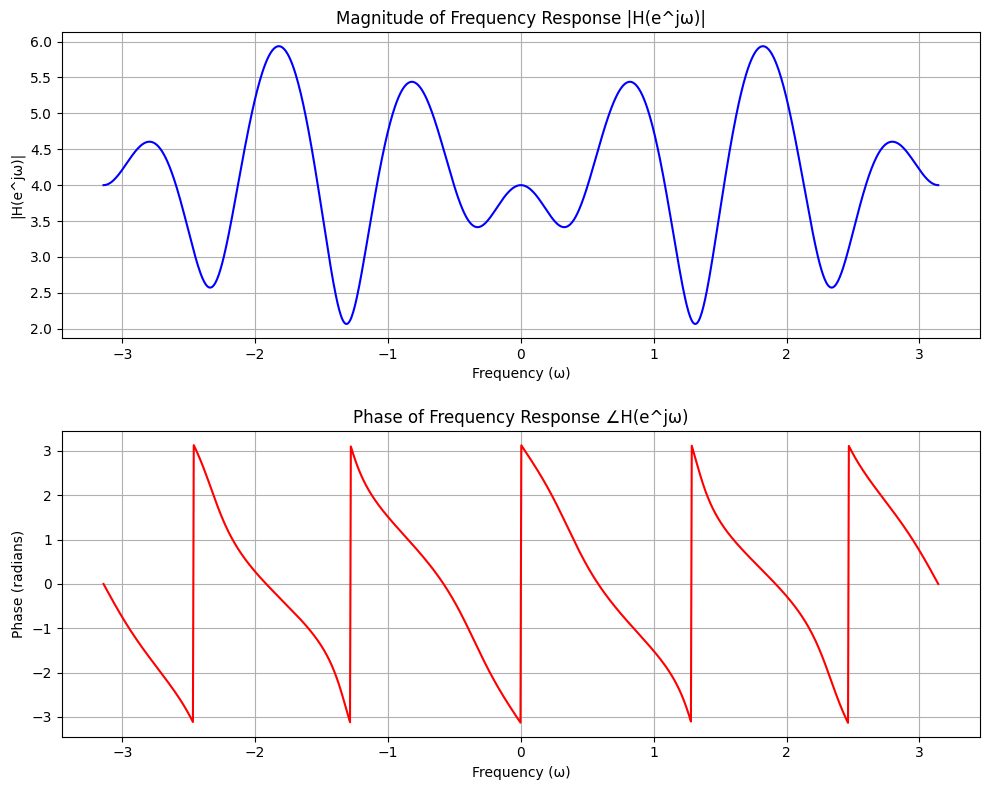

In [15]:
omega = np.linspace(-np.pi, np.pi, 1000)

H = 1 - np.exp(1j * omega * 2) - 4 * np.exp(1j * omega * -5)
magnitude = np.abs(H)
phase = np.angle(H)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(omega, magnitude, label='Magnitude', color='b')
ax1.set_title('Magnitude of Frequency Response |H(e^jω)|')
ax1.set_xlabel('Frequency (ω)')
ax1.set_ylabel('|H(e^jω)|')
ax1.grid(True)

ax2.plot(omega, phase, label='Phase', color='r')
ax2.set_title('Phase of Frequency Response ∠H(e^jω)')
ax2.set_xlabel('Frequency (ω)')
ax2.set_ylabel('Phase (radians)')
ax2.grid(True)

plt.tight_layout(h_pad=2)
plt.show()

In [21]:
def plot_fft_y(y: ndarray[Any, dtype[Any]]):
    Y = fft(y)
    magnitude_Y = np.abs(Y)
    phase_Y = np.angle(Y)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.stem(magnitude_Y, linefmt='b-', markerfmt='bo', basefmt='r-')
    ax1.set_title('Magnitude of DFT of the System Output')
    ax1.set_xlabel('Frequency Index')
    ax1.set_ylabel('|Y[k]|')
    ax1.grid(True)

    ax2.stem(phase_Y, linefmt='r-', markerfmt='ro', basefmt='b-')
    ax2.set_title('Phase of DFT of the System Output')
    ax2.set_xlabel('Frequency Index')
    ax2.set_ylabel('Phase (radians)')
    ax2.grid(True)

    plt.tight_layout(h_pad=2)
    plt.show()

In [25]:
x = np.array([6, 5, 3, 2, 2, 0, 3, 0, 2, 1])
y = np.zeros_like(x, dtype=float)
N = len(x)

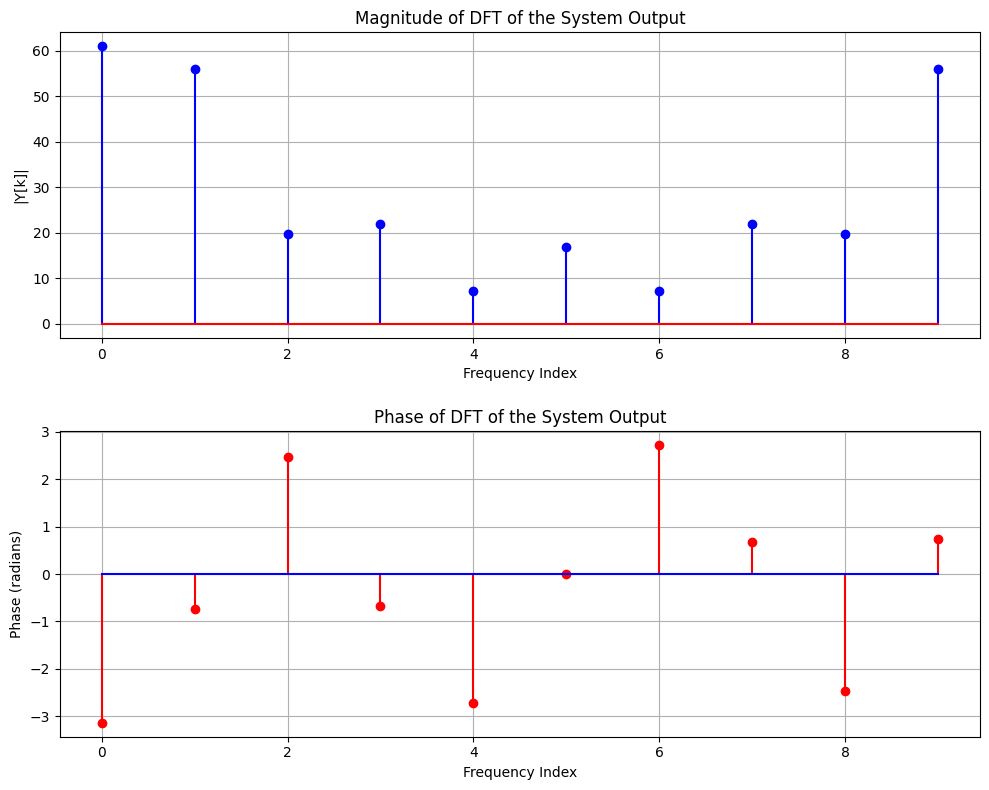

In [28]:
for n in range(N):
    y[n] = x[n]
    if n + 2 < len(x):
        y[n] -= x[n + 2]
    if n - 5 >= 0:
        y[n] -= 4 * x[n - 5]

plot_fft_y(y)

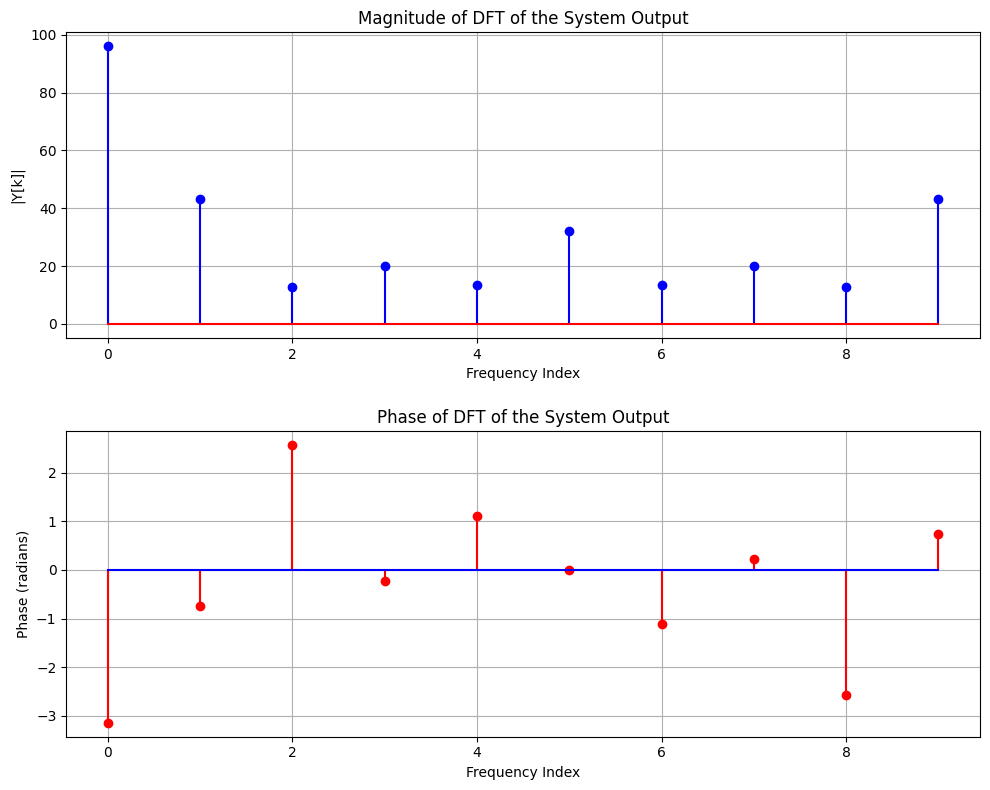

In [29]:
for n in range(N):
    y[n] = x[n] - x[(n + 2) % N] - 4 * x[(n - 5) % N]

plot_fft_y(y)